# Get Data

In [884]:
# Only use full for Google colab
try:
    import google.colab
    print("Running on Google Colab")
    import subprocess

    def run_command(command):
        """Runs a command line command."""
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
        output, err = process.communicate()
        return output.decode("utf-8")
    run_command("wget https://raw.githubusercontent.com/anilkumarKanasani/tensorflow-deep-learning/main/Notebooks/helper_functions.py")
    print("Data Import completed on Google Colab")

except:
    print("Not running on Google Colab")

Not running on Google Colab


In [885]:
# pandas read csv with parse_dates as index_col
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                    parse_dates=['Date'],
                    index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [886]:
# rename columns Close to price (USD) to price
df.rename(columns={'Closing Price (USD)': 'Price'}, inplace=True)
df.head()

,Currency,Price,24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


We will use the Price column as the predicted variable and all the other numerical columns as features.

# Explore Data

In [887]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Currency        2787 non-null   object 
 1   Price           2787 non-null   float64
 2   24h Open (USD)  2787 non-null   float64
 3   24h High (USD)  2787 non-null   float64
 4   24h Low (USD)   2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [888]:
# Get the date range of the data
print(f"Earliest date: {df.index.min()}, \nLatest date: {df.index.max()}, \nNumber of days: {df.index.max() - df.index.min()}")

Earliest date: 2013-10-01 00:00:00, 
Latest date: 2021-05-18 00:00:00, 
Number of days: 2786 days 00:00:00


In [889]:
# Do we have a sample for every day?
print(f"Number of days in total: {len(df)}")
print(f"Number of days with samples: {len(df.index.unique())}")

Number of days in total: 2787
Number of days with samples: 2787


In [890]:
# Do we have any missing days?
print(f"Number of missing days: {len(df) - len(df.index.unique())}")

Number of missing days: 0


In [891]:
# missing values in the data
df.isna().sum()

Currency          0
Price             0
24h Open (USD)    0
24h High (USD)    0
24h Low (USD)     0
dtype: int64

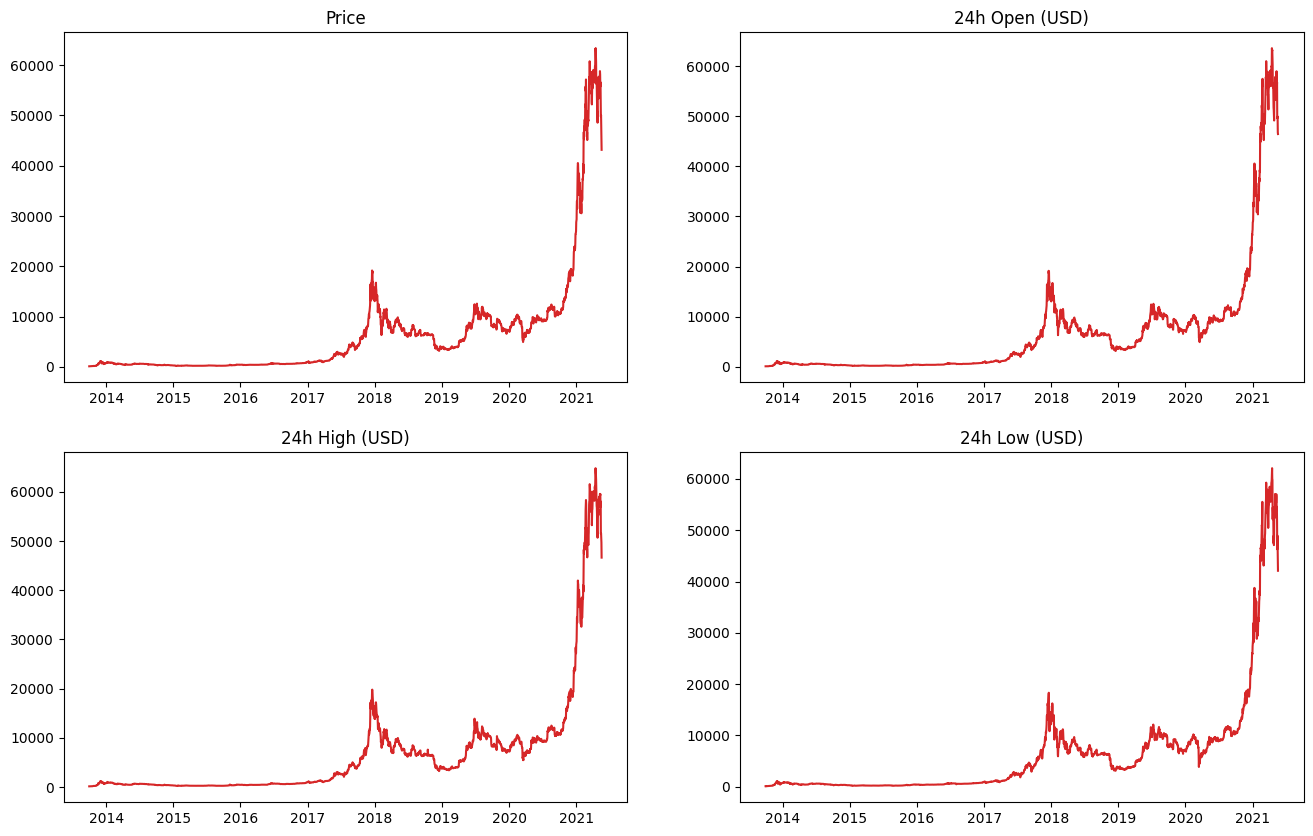

In [892]:
# define a function to take column name as input and plot the data
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show() 

# plot the data for closing price, 24h Open, 24h High, 24h Low as subplots in 2 rows and 2 columns
plt.figure(figsize=(16,10), dpi=100)
plt.subplot(2,2,1)
plt.plot(df.index, df['Price'], color='tab:red')
plt.title('Price')
plt.subplot(2,2,2)
plt.plot(df.index, df['24h Open (USD)'], color='tab:red')
plt.title('24h Open (USD)')
plt.subplot(2,2,3)
plt.plot(df.index, df['24h High (USD)'], color='tab:red')
plt.title('24h High (USD)')
plt.subplot(2,2,4)
plt.plot(df.index, df['24h Low (USD)'], color='tab:red')
plt.title('24h Low (USD)')
plt.show()

In [893]:
# Is all the columns are correlated?
df.corr()

,Price,24h Open (USD),24h High (USD),24h Low (USD)
Price,1.000000,0.998892,0.999527,0.999403
24h Open (USD),0.998892,1.000000,0.999476,0.999096
24h High (USD),0.999527,0.999476,1.000000,0.999028
24h Low (USD),0.999403,0.999096,0.999028,1.000000


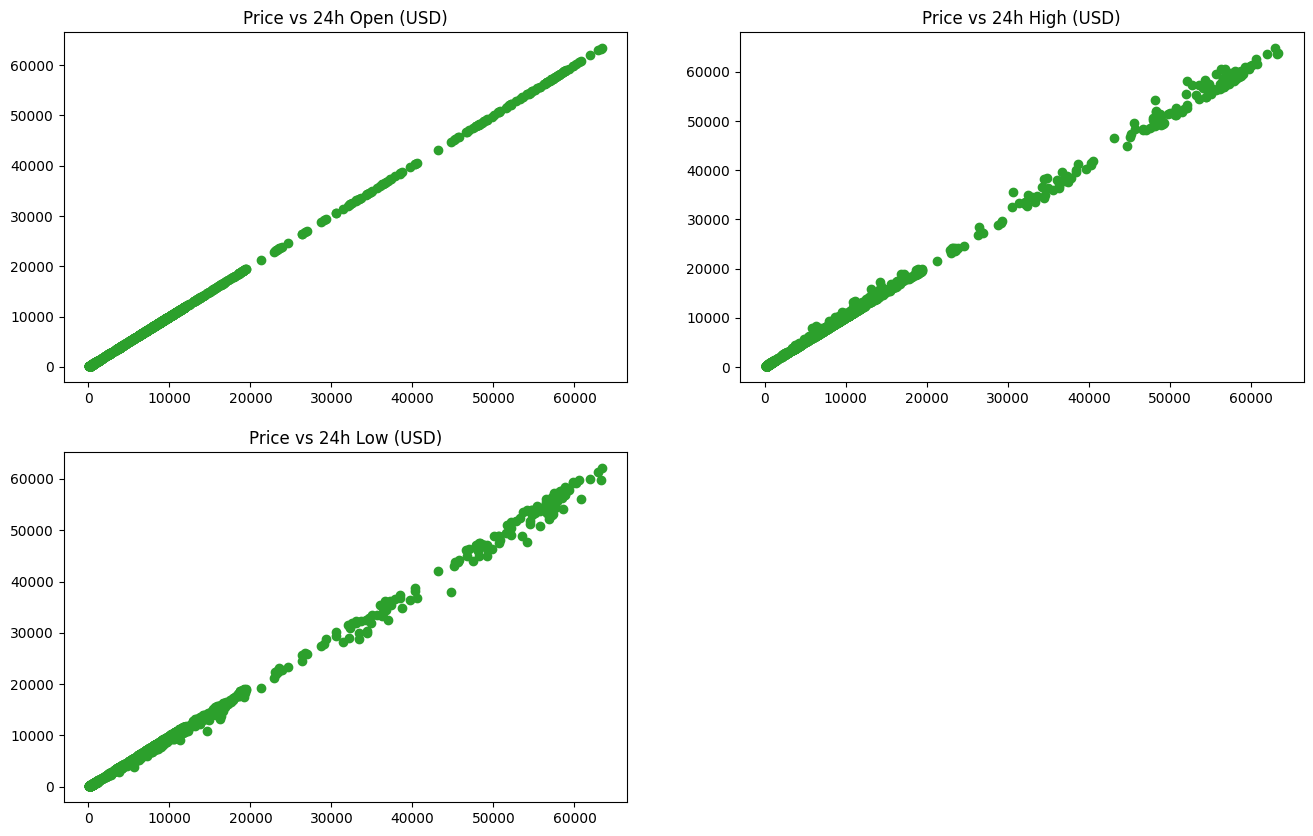

In [894]:
# scatter plot for all the columns as subplots in 2 rows and 2 columns
plt.figure(figsize=(16,10), dpi=100)
plt.subplot(2,2,1)
plt.scatter(df['Price'], df['Price'], color='tab:green')
plt.title('Price vs 24h Open (USD)')
plt.subplot(2,2,2)
plt.scatter(df['Price'], df['24h High (USD)'], color='tab:green')
plt.title('Price vs 24h High (USD)')
plt.subplot(2,2,3)
plt.scatter(df['Price'], df['24h Low (USD)'], color='tab:green')
plt.title('Price vs 24h Low (USD)')
plt.show()

# Split Data

In [895]:
# total number of samples
len(df)

2787

In [896]:
# split the data into train and test
split_size = int(len(df) * 0.8)
train_df = df[:split_size]
test_df = df[split_size:]
len(train_df), len(test_df)

(2229, 558)

In [897]:
# Percentage of train and test data
print(f"Percentage of train data: {len(train_df)/len(df)*100:.2f}%")
print(f"Percentage of test data: {len(test_df)/len(df)*100:.2f}%")

Percentage of train data: 79.98%
Percentage of test data: 20.02%


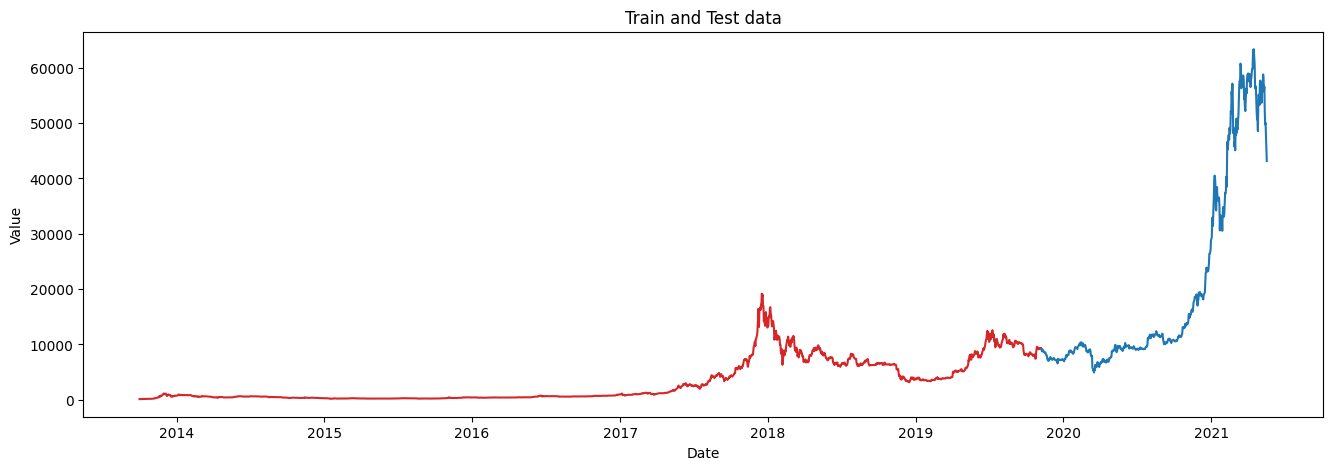

In [898]:
# plot the train and test data as function of time with start and end date
def plot_train_test(train_df, test_df, title="", xlabel='Date', ylabel='Value', start=0, end=None, dpi=100):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(train_df.index[start:end], train_df['Price'][start:end], color='tab:red')
    plt.plot(test_df.index, test_df['Price'], color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_train_test(train_df, test_df, start=0, end=None,title='Train and Test data')


In [899]:
# get X_train, y_train, X_test, y_test
X_train, y_train = train_df.drop(['Price','Currency'], axis=1), train_df['Price']
X_test, y_test = test_df.drop(['Price','Currency'], axis=1), test_df['Price']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229, 3), (2229,), (558, 3), (558,))

# Prediction Models

* Model 0 : Naive Model (baseline)
* Model 1 : Dense Model , Horizon = 1, window_size = 7
* Model 2 : Same as Model 1 , Horizon = 1, window_size = 30
* Model 3 : Same as Model 1 , Horizon = 7, window_size = 30
* Model 4 : Conv1D
* Model 5 : LSTM
* Model 6 : Same as Model 1 with multivariate data
* Model 7 : N-BEATS Algorithm
* Model 8 : Ensemble Model
* Model 9 : Future Prediction Model
* Model 10 : Same as Model 1 with turkey data

## Helper Functions

#### Evaluation Metrics

In [900]:
# A function to get Evaluation Metrics Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Mean absolute percentage error,
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# A custom function to calculate mean_absolute_scaled_error.
def mean_absolute_scaled_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mase = mae / mean_absolute_error(y_true[1:], y_true[:-1])
    return mase

def evaluate_preds(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mase = mean_absolute_scaled_error(y_true, y_pred)
    metric_dict = {"mae": round(mae,2),
                   "mse": round(mse,2),
                   "rmse": round(rmse,2),
                   "mape": round(mape,2),
                   "mase": round(mase,2)
                   }
    return metric_dict

#### Plot the model forcast curve

In [901]:
# plot the naive_forcast and y_test as function of time with start and end date
def plot_forcast(y_test, y_pred, title="", xlabel='Date', ylabel='Value', start=0, end=None, dpi=100):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(y_test.index[start:end], y_test[start:end], color='tab:red')
    plt.plot(y_test.index[start:end], y_pred[start:end], color='tab:green')
    return plt

|### Windowing Data set

In [902]:
def get_window_data(y_train,y_test, window_size, horizon):
    X_train_windowed = []
    y_train_Horizons = []
    for i in range(window_size,len(y_train)-horizon+1):
        X_train_windowed.append(y_train[i-window_size:i])
        y_train_Horizons.append(y_train[i:i+horizon])
    X_train_windowed = np.array(X_train_windowed)
    y_train_Horizons = np.array(y_train_Horizons)

    print(f"X_train_windowed shape: {X_train_windowed.shape}")
    print(f"y_train_Horizons shape: {y_train_Horizons.shape}")

    X_test_windowed = []
    y_test_Horizons = []
    for i in range(window_size,len(y_test)-horizon+1):
        X_test_windowed.append(y_test[i-window_size:i])
        y_test_Horizons.append(y_test[i:i+horizon])
    X_test_windowed = np.array(X_test_windowed)
    y_test_Horizons = np.array(y_test_Horizons)
    print(f"X_test_windowed shape: {X_test_windowed.shape}")
    print(f"y_test_Horizons shape: {y_test_Horizons.shape}")
    return X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons

In [903]:
# test with sample data to check the output of get_window_data function
y_sample_train = np.arange(100)
y_sample_test = np.arange(100,120)
print(y_sample_train)
X_train_windowed, y_train_Horizons, X_test_windowed, y_test_Horizons = get_window_data(y_sample_train,y_sample_test,
                                                                                       window_size=30, horizon=7)

# print the sample of X_train_windowed and y_train_Horizons as data frame
df_sample_test = pd.DataFrame(columns=['Window','Label'])
for (x_sample,y_sample) in zip(X_train_windowed, y_train_Horizons):
    df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)

df_sample_test

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
X_train_windowed shape: (64, 30)
y_train_Horizons shape: (64, 7)
X_test_windowed shape: (0,)
y_test_Horizons shape: (0,)


/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel_99664/3549606945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)
/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel_99664/3549606945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)
/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel_99664/3549606945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_test = df_sample_test.append({'Window':x_sample,'Label':y_sample}, ignore_index=True)
/var/folders/t7/j_q0l7w9757_gtsf3gjzsnpx8y5_w2/T/ipykernel

,Window,Label
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[30, 31, 32, 33, 34, 35, 36]"
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[31, 32, 33, 34, 35, 36, 37]"
2,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[32, 33, 34, 35, 36, 37, 38]"
3,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[33, 34, 35, 36, 37, 38, 39]"
4,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[34, 35, 36, 37, 38, 39, 40]"
...,...,...
59,"[59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7...","[89, 90, 91, 92, 93, 94, 95]"
60,"[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...","[90, 91, 92, 93, 94, 95, 96]"
61,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...","[91, 92, 93, 94, 95, 96, 97]"
62,"[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 7...","[92, 93, 94, 95, 96, 97, 98]"


## Model 0 : Naive Model (baseline)

In [904]:
# Naive Model predict the next day price as today's price
naive_forcast = y_test.shift(1)
# data frame of naive_forcast and y_test
pd.DataFrame({'naive_forcast':naive_forcast, 'y_test':y_test})

,naive_forcast,y_test
Date,,
2019-11-08,NaN,9226.485821
2019-11-09,9226.485821,8794.358645
2019-11-10,8794.358645,8798.042055
2019-11-11,8798.042055,9081.186878
2019-11-12,9081.186878,8711.534339
...,...,...
2021-05-14,52147.821187,49764.132082
2021-05-15,49764.132082,50032.693137
2021-05-16,50032.693137,47885.625255


In [905]:
# get the evaluation metrics for naive_forcast
naive_forcast_metrics = evaluate_preds(y_test[1:], naive_forcast[1:])
naive_forcast_metrics

{'mae': 567.98, 'mse': 1147547.13, 'rmse': 1071.24, 'mape': 2.52, 'mase': 1.0}

## Model 1 : Dense Model,  Horizon = 1, window_size = 7

In [906]:
# define a dense model with horizon and window_size as input
import tensorflow as tf
def dense_model(horizon, window_size):
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(window_size)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(horizon, activation='linear')
                                ])
    return model

model_1 = dense_model(horizon=1, window_size=7)
model_1.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               1024      
                                                                 
 dense_121 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [907]:
X_train_1_windowed, y_train_1_Horizons, X_test_1_windowed, y_test_1_Horizons = get_window_data(y_train,y_test, window_size=7, horizon=1)

X_train_windowed shape: (2222, 7)
y_train_Horizons shape: (2222, 1)
X_test_windowed shape: (551, 7)
y_test_Horizons shape: (551, 1)


In [908]:
# compile the model
from helper_functions import prepare_checkpoint_call_back
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# fit the model
history_1 = model_1.fit(X_train_1_windowed, y_train_1_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_1_windowed, y_test_1_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_1_Horizon_1_window_size_7")])

Saving Checkpoints to files :  model_check_point_logs/model_1_Horizon_1_window_size_7
Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 1931.8163 - mae: 1931.8163 - mse: 9434828.0000INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 65ms/step - loss: 784.5053 - mae: 784.5053 - mse: 2277419.2500 - val_loss: 2606.8135 - val_mae: 2606.8135 - val_mse: 15897949.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 519.3942 - mae: 519.3942 - mse: 769914.4375INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 25ms/step - loss: 260.5649 - mae: 260.5649 - mse: 293451.6562 - val_loss: 1028.3044 - val_mae: 1028.3044 - val_mse: 3474395.7500
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 190.2076 - mae: 190.2076 - mse: 182563.0156 - val_loss: 1034.0643 - val_mae: 1034.0643 - val_mse: 3398892.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 235.8276 - mae: 235.8276 - mse: 291216.4375INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 181.3003 - mae: 181.3003 - mse: 172684.2031 - val_loss: 984.2569 - val_mae: 984.2569 - val_mse: 3259792.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 144.1144 - mae: 144.1144 - mse: 146659.2344INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 24ms/step - loss: 177.1029 - mae: 177.1029 - mse: 164341.3438 - val_loss: 956.5168 - val_mae: 956.5168 - val_mse: 3083571.2500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 200.7755 - mae: 200.7755 - mse: 203909.3125INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 26ms/step - loss: 167.2557 - mae: 167.2557 - mse: 149713.2812 - val_loss: 926.1677 - val_mae: 926.1677 - val_mse: 2766508.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 191.3673 - mae: 191.3673 - mse: 243657.8438INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 24ms/step - loss: 159.5130 - mae: 159.5130 - mse: 138393.5312 - val_loss: 881.3776 - val_mae: 881.3776 - val_mse: 2535126.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 154.0715 - mae: 154.0715 - mse: 129545.0859INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 151.7476 - mae: 151.7476 - mse: 124615.4141 - val_loss: 838.6650 - val_mae: 838.6650 - val_mse: 2299501.7500
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 147.6560 - mae: 147.6560 - mse: 120569.0547 - val_loss: 871.3770 - val_mae: 871.3770 - val_mse: 2301401.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6617 - mae: 126.6617 - mse: 77213.2891INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 143.5018 - mae: 143.5018 - mse: 113688.6875 - val_loss: 799.4869 - val_mae: 799.4869 - val_mse: 2076095.3750
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6419 - mae: 133.6419 - mse: 84768.5625INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 24ms/step - loss: 146.2060 - mae: 146.2060 - mse: 115105.4922 - val_loss: 778.2263 - val_mae: 778.2263 - val_mse: 2039796.8750
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7384 - mae: 126.7384 - mse: 67428.1953INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 142.8187 - mae: 142.8187 - mse: 110842.0000 - val_loss: 774.0101 - val_mae: 774.0101 - val_mse: 2009076.1250
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 144.4845 - mae: 144.4845 - mse: 109251.0781 - val_loss: 1026.6160 - val_mae: 1026.6160 - val_mse: 2743786.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4730 - mae: 125.4730 - mse: 52739.1641INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 149.1971 - mae: 149.1971 - mse: 115733.1641 - val_loss: 737.8489 - val_mae: 737.8489 - val_mse: 1831546.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 140.2411 - mae: 140.2411 - mse: 104473.3594INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 25ms/step - loss: 133.4741 - mae: 133.4741 - mse: 98514.9922 - val_loss: 724.8909 - val_mae: 724.8909 - val_mse: 1765914.2500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.9474 - mae: 125.9474 - mse: 90376.6719INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 130.5101 - mae: 130.5101 - mse: 95460.0312 - val_loss: 714.3456 - val_mae: 714.3456 - val_mse: 1717641.3750
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 116.9898 - mae: 116.9898 - mse: 58719.4336INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 127.3952 - mae: 127.3952 - mse: 92529.0703 - val_loss: 701.1138 - val_mae: 701.1138 - val_mse: 1647440.3750
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 128.7757 - mae: 128.7757 - mse: 93723.7812 - val_loss: 707.5339 - val_mae: 707.5339 - val_mse: 1617488.1250
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 98.8335 - mae: 98.8335 - mse: 57529.3672INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 131.9906 - mae: 131.9906 - mse: 95659.0781 - val_loss: 694.1816 - val_mae: 694.1816 - val_mse: 1632209.1250
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 126.0543 - mae: 126.0543 - mse: 90809.5703 - val_loss: 708.7171 - val_mae: 708.7171 - val_mse: 1576040.5000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 158.2387 - mae: 158.2387 - mse: 149433.6719INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 24ms/step - loss: 121.9321 - mae: 121.9321 - mse: 86253.4688 - val_loss: 669.2409 - val_mae: 669.2409 - val_mse: 1477712.8750
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2405 - mae: 125.2405 - mse: 72884.4609INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 21ms/step - loss: 118.9074 - mae: 118.9074 - mse: 84351.9609 - val_loss: 664.2437 - val_mae: 664.2437 - val_mse: 1457134.3750
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 120.6983 - mae: 120.6983 - mse: 84589.7812 - val_loss: 665.3866 - val_mae: 665.3866 - val_mse: 1452002.6250
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8675 - mae: 125.8675 - mse: 130208.0625INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 119.3415 - mae: 119.3415 - mse: 83705.4609 - val_loss: 640.4831 - val_mae: 640.4831 - val_mse: 1413113.5000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 64.7174 - mae: 64.7174 - mse: 20887.5098INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 116.6330 - mae: 116.6330 - mse: 81799.5234 - val_loss: 635.4456 - val_mae: 635.4456 - val_mse: 1392769.5000
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 115.9213 - mae: 115.9213 - mse: 80925.6094 - val_loss: 641.4694 - val_mae: 641.4694 - val_mse: 1423536.5000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 103.2790 - mae: 103.2790 - mse: 39072.7812INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 115.6799 - mae: 115.6799 - mse: 81083.0391 - val_loss: 629.6290 - val_mae: 629.6290 - val_mse: 1383186.3750
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 119.5840 - mae: 119.5840 - mse: 83259.4766 - val_loss: 704.5994 - val_mae: 704.5994 - val_mse: 1606135.6250
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 117.7089 - mae: 117.7089 - mse: 79771.8516 - val_loss: 669.0704 - val_mae: 669.0704 - val_mse: 1430691.7500
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 104.8174 - mae: 104.8174 - mse: 62301.5195INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 21ms/step - loss: 113.9039 - mae: 113.9039 - mse: 77750.8125 - val_loss: 625.9736 - val_mae: 625.9736 - val_mse: 1338012.2500
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 117.1652 - mae: 117.1652 - mse: 79244.1484 - val_loss: 642.3457 - val_mae: 642.3457 - val_mse: 1365389.2500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 140.5754 - mae: 140.5754 - mse: 103849.7812INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 114.5432 - mae: 114.5432 - mse: 78766.5391 - val_loss: 612.4917 - val_mae: 612.4917 - val_mse: 1325411.7500
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 114.3311 - mae: 114.3311 - mse: 78173.6641 - val_loss: 642.3044 - val_mae: 642.3044 - val_mse: 1358434.2500
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9652 - mae: 112.9652 - mse: 76522.7188 - val_loss: 693.9037 - val_mae: 693.9037 - val_mse: 1545890.0000
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 119.7383 - mae: 119.7383 - mse: 82656.0234 - val_loss: 623.2825 - val_mae: 623.2825 - val_mse: 1314589.2500
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 98.4160 - mae: 98.4160 - mse: 45283.2188INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 25ms/step - loss: 114.1501 - mae: 114.1501 - mse: 76593.6406 - val_loss: 608.1041 - val_mae: 608.1041 - val_mse: 1284759.7500
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 112.1355 - mae: 112.1355 - mse: 76900.0312 - val_loss: 666.3967 - val_mae: 666.3967 - val_mse: 1402760.1250
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 115.3649 - mae: 115.3649 - mse: 77708.5703 - val_loss: 680.1018 - val_mae: 680.1018 - val_mse: 1492010.0000
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 162.0594 - mae: 162.0594 - mse: 135840.9688INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 24ms/step - loss: 115.3329 - mae: 115.3329 - mse: 78433.9766 - val_loss: 598.8948 - val_mae: 598.8948 - val_mse: 1267597.8750
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 117.5617 - mae: 117.5617 - mse: 79311.9531 - val_loss: 648.5107 - val_mae: 648.5107 - val_mse: 1356458.0000
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 114.2426 - mae: 114.2426 - mse: 75464.1172 - val_loss: 711.4860 - val_mae: 711.4860 - val_mse: 1508423.5000
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 116.9130 - mae: 116.9130 - mse: 78798.0391 - val_loss: 651.7590 - val_mae: 651.7590 - val_mse: 1360637.5000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 111.8731 - mae: 111.8731 - mse: 55793.5078INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 24ms/step - loss: 116.3339 - mae: 116.3339 - mse: 79405.6953 - val_loss: 594.0939 - val_mae: 594.0939 - val_mse: 1260380.0000
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5336 - mae: 110.5336 - mse: 75570.9766 - val_loss: 610.5301 - val_mae: 610.5301 - val_mse: 1272500.7500
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 92.7584 - mae: 92.7584 - mse: 37224.2695INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 26ms/step - loss: 112.0754 - mae: 112.0754 - mse: 74793.6641 - val_loss: 590.3268 - val_mae: 590.3268 - val_mse: 1246584.7500
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9022 - mae: 109.9022 - mse: 73521.2578 - val_loss: 638.7837 - val_mae: 638.7837 - val_mse: 1326012.0000
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 112.8530 - mae: 112.8530 - mse: 73966.1016 - val_loss: 628.4845 - val_mae: 628.4845 - val_mse: 1304171.1250
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6573 - mae: 110.6573 - mse: 73712.5312 - val_loss: 655.4019 - val_mae: 655.4019 - val_mse: 1404081.0000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 135.2009 - mae: 135.2009 - mse: 150115.8281INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 113.3693 - mae: 113.3693 - mse: 75528.1484 - val_loss: 586.9622 - val_mae: 586.9622 - val_mse: 1236829.8750
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 109.8471 - mae: 109.8471 - mse: 72970.9219 - val_loss: 718.7613 - val_mae: 718.7613 - val_mse: 1590276.6250
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 117.1567 - mae: 117.1567 - mse: 80821.7969 - val_loss: 588.9932 - val_mae: 588.9932 - val_mse: 1243454.7500
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 108.5254 - mae: 108.5254 - mse: 72531.2266 - val_loss: 604.0572 - val_mae: 604.0572 - val_mse: 1250426.6250
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 101.2666 - mae: 101.2666 - mse: 68371.0312INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 48ms/step - loss: 111.2236 - mae: 111.2236 - mse: 71903.2422 - val_loss: 584.7723 - val_mae: 584.7723 - val_mse: 1229821.5000
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9947 - mae: 109.9947 - mse: 74112.4609 - val_loss: 631.0087 - val_mae: 631.0087 - val_mse: 1336136.3750
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 109.5732 - mae: 109.5732 - mse: 72192.6797 - val_loss: 625.4601 - val_mae: 625.4601 - val_mse: 1321019.7500
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 109.5850 - mae: 109.5850 - mse: 73091.4375 - val_loss: 617.6463 - val_mae: 617.6463 - val_mse: 1304778.6250
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 114.2625 - mae: 114.2625 - mse: 75545.3984 - val_loss: 660.8878 - val_mae: 660.8878 - val_mse: 1366481.7500
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 109.1066 - mae: 109.1066 - mse: 

INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 115.7276 - mae: 115.7276 - mse: 74444.4688 - val_loss: 582.3076 - val_mae: 582.3076 - val_mse: 1221468.1250
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3762 - mae: 109.3762 - mse: 72375.7422 - val_loss: 583.7346 - val_mae: 583.7346 - val_mse: 1215341.0000
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8649 - mae: 107.8649 - mse: 71481.9766 - val_loss: 609.2350 - val_mae: 609.2350 - val_mse: 1255303.8750
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3762 - mae: 110.3762 - mse: 72214.5625 - val_loss: 588.6995 - val_mae: 588.6995 - val_mse: 1238053.8750
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 107.2011 - mae: 107.2011 - mse: 71267.8594 - val_loss: 585.9124 - val_mae: 585.9124 - val_mse: 1230087.1250
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3726 - mae: 110.3726 - m

INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 25ms/step - loss: 110.0539 - mae: 110.0539 - mse: 72109.8281 - val_loss: 579.4666 - val_mae: 579.4666 - val_mse: 1209121.8750
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 109.8745 - mae: 109.8745 - mse: 72130.3516 - val_loss: 676.8320 - val_mae: 676.8320 - val_mse: 1444594.2500
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9091 - mae: 109.9091 - mse: 73105.2578 - val_loss: 584.2755 - val_mae: 584.2755 - val_mse: 1211771.8750
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 107.2651 - mae: 107.2651 - mse: 71272.9297 - val_loss: 608.6069 - val_mae: 608.6069 - val_mse: 1251601.0000
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 107.9118 - mae: 107.9118 - mse: 71637.6562 - val_loss: 585.6356 - val_mae: 585.6356 - val_mse: 1229015.2500
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7714 - mae: 109.7714 - m

INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 21ms/step - loss: 109.7164 - mae: 109.7164 - mse: 72391.5156 - val_loss: 576.4091 - val_mae: 576.4091 - val_mse: 1203616.0000
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 106.6330 - mae: 106.6330 - mse: 70000.4141 - val_loss: 577.9429 - val_mae: 577.9429 - val_mse: 1196179.0000
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 113.2221 - mae: 113.2221 - mse: 73493.3828 - val_loss: 591.2394 - val_mae: 591.2394 - val_mse: 1215525.6250
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 110.1381 - mae: 110.1381 - mse: 71542.8281 - val_loss: 628.7450 - val_mae: 628.7450 - val_mse: 1314981.6250
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 106.2644 - mae: 106.2644 - mse: 69812.7812 - val_loss: 603.7327 - val_mae: 603.7327 - val_mse: 1236339.0000
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 107.6167 - mae: 107.6167 - m

INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 25ms/step - loss: 107.4860 - mae: 107.4860 - mse: 71886.4609 - val_loss: 572.7053 - val_mae: 572.7053 - val_mse: 1188320.0000
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 106.2706 - mae: 106.2706 - mse: 71592.5078 - val_loss: 573.1764 - val_mae: 573.1764 - val_mse: 1190143.1250
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 105.8322 - mae: 105.8322 - mse: 69062.2031 - val_loss: 575.2931 - val_mae: 575.2931 - val_mse: 1191706.7500
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 106.8969 - mae: 106.8969 - mse: 70650.5625 - val_loss: 673.1427 - val_mae: 673.1427 - val_mse: 1425564.7500
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 113.5830 - mae: 113.5830 - mse: 72876.1250 - val_loss: 578.3734 - val_mae: 578.3734 - val_mse: 1201098.6250
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 106.6428 - mae: 106.6428 - m

INFO:tensorflow:Assets written to: model_check_point_logs/model_1_Horizon_1_window_size_7/assets


18/18 [==============================] - 0s 21ms/step - loss: 107.1616 - mae: 107.1616 - mse: 70173.6797 - val_loss: 571.5702 - val_mae: 571.5702 - val_mse: 1185001.1250
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 106.2164 - mae: 106.2164 - mse: 70643.2266 - val_loss: 608.8539 - val_mae: 608.8539 - val_mse: 1243350.3750
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 107.1445 - mae: 107.1445 - mse: 70268.5547 - val_loss: 593.8246 - val_mae: 593.8246 - val_mse: 1235030.0000
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9451 - mae: 109.9451 - mse: 70772.1016 - val_loss: 588.4923 - val_mae: 588.4923 - val_mse: 1224086.3750
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 115.7424 - mae: 115.7424 - mse: 76770.7812 - val_loss: 776.9217 - val_mae: 776.9217 - val_mse: 1745058.6250
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 120.4852 - mae: 120.4852 - m

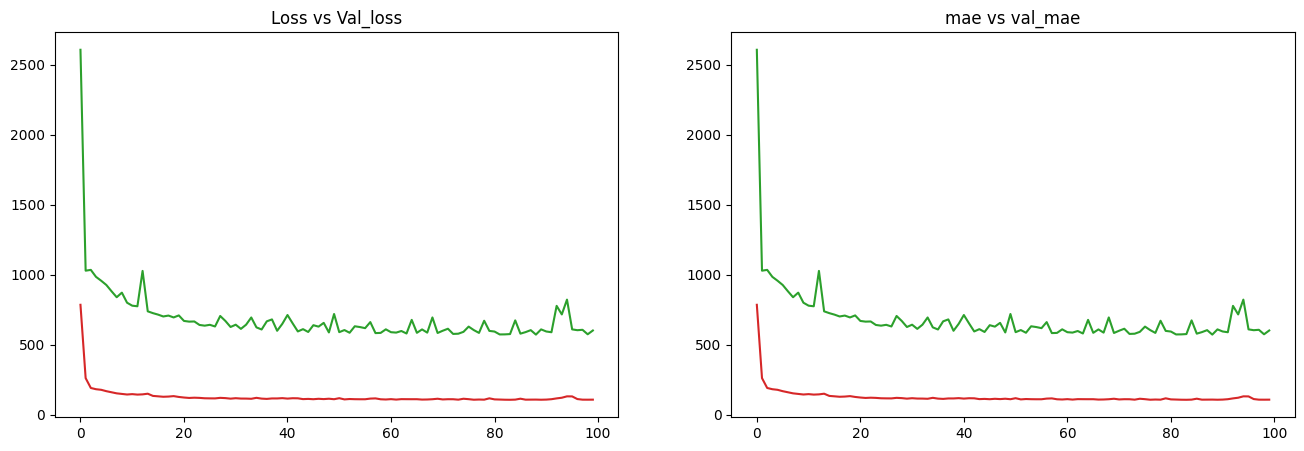

In [909]:
# plot the loss curve
history_1_df = pd.DataFrame(history_1.history)

# sub plots of mae, mse and val_loss
plt.figure(figsize=(16,5), dpi=100)
plt.subplot(1,2,1)
plt.plot(history_1_df['loss'], color='tab:red')
plt.plot(history_1_df['val_loss'], color='tab:green')
plt.title('Loss vs Val_loss')
plt.subplot(1,2,2)
plt.plot(history_1_df['mae'], color='tab:red')
plt.plot(history_1_df['val_mae'], color='tab:green')
plt.title('mae vs val_mae')
plt.show()

In [910]:
# load the model from the checkpoint
model_1 = tf.keras.models.load_model('model_check_point_logs/model_1_Horizon_1_window_size_7')

# save the model
model_1.save('saved_models/model_1_Horizon_1_window_size_7.h5')

In [911]:
# get the evaluation metrics for model_1
model_1.evaluate(X_test_1_windowed, y_test_1_Horizons)

18/18 [==============================] - 0s 917us/step - loss: 571.5701 - mae: 571.5701 - mse: 1185001.2500


[571.5701293945312, 571.5701293945312, 1185001.25]

In [912]:
# y_pred for model_1
y_pred_1 = model_1.predict(X_test_1_windowed)
y_pred_1 = tf.squeeze(y_pred_1)
y_pred_1.shape , y_test_1_Horizons.shape

(TensorShape([551]), (551, 1))

In [913]:
model_1_forcast_metrics = evaluate_preds(y_test_1_Horizons, y_pred_1)
model_1_forcast_metrics

{'mae': 571.57, 'mse': 1185001.0, 'rmse': 1088.58, 'mape': 113.9, 'mase': 1.0}

## Model 2 : Same as Model 1,  Horizon = 1, window_size = 30

In [914]:
model_2 = dense_model(horizon=1, window_size=30)
model_2.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 128)               3968      
                                                                 
 dense_123 (Dense)           (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [915]:
X_train_2_windowed, y_train_2_Horizons, X_test_2_windowed, y_test_2_Horizons = get_window_data(y_train,y_test, window_size=30, horizon=1)

X_train_windowed shape: (2199, 30)
y_train_Horizons shape: (2199, 1)
X_test_windowed shape: (528, 30)
y_test_Horizons shape: (528, 1)


In [916]:
# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# fit the model
history_2 = model_2.fit(X_train_2_windowed, y_train_2_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_2_windowed, y_test_2_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_2_Horizon_1_window_size_30")])

Saving Checkpoints to files :  model_check_point_logs/model_2_Horizon_1_window_size_30
Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 3396.9097 - mae: 3396.9097 - mse: 26658772.0000INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 29ms/step - loss: 1086.5264 - mae: 1086.5264 - mse: 4704233.0000 - val_loss: 4389.6929 - val_mae: 4389.6929 - val_mse: 38993784.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 525.5234 - mae: 525.5234 - mse: 821833.0000INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 450.0263 - mae: 450.0263 - mse: 848531.6250 - val_loss: 1902.5123 - val_mae: 1902.5123 - val_mse: 9435731.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 352.5197 - mae: 352.5197 - mse: 529085.7500INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 23ms/step - loss: 325.3594 - mae: 325.3594 - mse: 484035.6875 - val_loss: 1588.4004 - val_mae: 1588.4004 - val_mse: 6505191.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 228.7717 - mae: 228.7717 - mse: 162774.6094INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 225.3709 - mae: 225.3709 - mse: 230951.3281 - val_loss: 1347.1180 - val_mae: 1347.1180 - val_mse: 4729222.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 173.7294 - mae: 173.7294 - mse: 119517.0625INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 200.3765 - mae: 200.3765 - mse: 192644.9844 - val_loss: 1049.6852 - val_mae: 1049.6852 - val_mse: 3564525.5000
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 187.0513 - mae: 187.0513 - mse: 167360.3438 - val_loss: 1059.6561 - val_mae: 1059.6561 - val_mse: 3358752.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 200.2691 - mae: 200.2691 - mse: 202840.8125INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 33ms/step - loss: 198.3281 - mae: 198.3281 - mse: 175491.9844 - val_loss: 986.6968 - val_mae: 986.6968 - val_mse: 3195302.2500
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 194.1205 - mae: 194.1205 - mse: 167347.5781 - val_loss: 1249.7385 - val_mae: 1249.7385 - val_mse: 3963671.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 207.0099 - mae: 207.0099 - mse: 146670.1719INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 182.4401 - mae: 182.4401 - mse: 152847.8750 - val_loss: 945.0567 - val_mae: 945.0567 - val_mse: 2892979.0000
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 160.8824 - mae: 160.8824 - mse: 131826.0469 - val_loss: 1006.4182 - val_mae: 1006.4182 - val_mse: 3292494.2500
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 172.2609 - mae: 172.2609 - mse: 140978.4375 - val_loss: 1245.4415 - val_mae: 1245.4415 - val_mse: 4659727.0000
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 184.8525 - mae: 184.8525 - mse: 159176.0781 - val_loss: 1178.5778 - val_mae: 1178.5778 - val_mse: 3610241.0000
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 179.6833 - mae: 179.6833 - mse: 143040.5000 - val_loss: 978.2742 - val_mae: 978.2742 - val_mse: 3071209.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 158.2874 - mae: 158.2

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 160.7223 - mae: 160.7223 - mse: 125771.3828 - val_loss: 921.4910 - val_mae: 921.4910 - val_mse: 2574247.5000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 123.0669 - mae: 123.0669 - mse: 74009.3125INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 64ms/step - loss: 157.6501 - mae: 157.6501 - mse: 126132.8516 - val_loss: 863.7454 - val_mae: 863.7454 - val_mse: 2365893.5000
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 151.2130 - mae: 151.2130 - mse: 116308.0938 - val_loss: 953.3488 - val_mae: 953.3488 - val_mse: 2592317.5000
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 159.9483 - mae: 159.9483 - mse: 118977.4688 - val_loss: 941.2116 - val_mae: 941.2116 - val_mse: 2853762.5000
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 149.9558 - mae: 149.9558 - mse: 116526.4141 - val_loss: 976.0104 - val_mae: 976.0104 - val_mse: 3014477.0000
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 157.5666 - mae: 157.5666 - mse: 119140.2031 - val_loss: 905.3664 - val_mae: 905.3664 - val_mse: 2419127.0000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 165.3391 - mae: 165.3391 - 

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 34ms/step - loss: 153.5948 - mae: 153.5948 - mse: 115229.1641 - val_loss: 812.8585 - val_mae: 812.8585 - val_mse: 2170953.5000
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 146.7064 - mae: 146.7064 - mse: 106387.2031 - val_loss: 853.7820 - val_mae: 853.7820 - val_mse: 2384384.7500
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 142.5986 - mae: 142.5986 - mse: 105461.6719 - val_loss: 816.1918 - val_mae: 816.1918 - val_mse: 2197134.0000
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2478 - mae: 144.2478 - mse: 107765.0469 - val_loss: 850.9608 - val_mae: 850.9608 - val_mse: 2371268.0000
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 139.6421 - mae: 139.6421 - mse: 104016.3828 - val_loss: 1223.2144 - val_mae: 1223.2144 - val_mse: 3643894.0000
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 158.2490 - mae: 158.2

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 141.4045 - mae: 141.4045 - mse: 103474.2812 - val_loss: 789.7858 - val_mae: 789.7858 - val_mse: 2087053.6250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 101.3301 - mae: 101.3301 - mse: 40526.3320INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 56ms/step - loss: 144.4457 - mae: 144.4457 - mse: 104308.3984 - val_loss: 769.3577 - val_mae: 769.3577 - val_mse: 1909851.3750
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0971 - mae: 130.0971 - mse: 101295.7578INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 152.1645 - mae: 152.1645 - mse: 115167.6328 - val_loss: 754.8984 - val_mae: 754.8984 - val_mse: 1880614.1250
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 142.7853 - mae: 142.7853 - mse: 105106.1797 - val_loss: 813.0293 - val_mae: 813.0293 - val_mse: 2016418.0000
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 137.6068 - mae: 137.6068 - mse: 97407.2109 - val_loss: 802.2145 - val_mae: 802.2145 - val_mse: 1974337.3750
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 132.7788 - mae: 132.7788 - mse: 95422.9141 - val_loss: 774.0336 - val_mae: 774.0336 - val_mse: 1982338.6250
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0467 - mae: 153.0467 - mse: 163991.8750INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 24ms/step - loss: 132.7159 - mae: 132.7159 - mse: 93679.7969 - val_loss: 745.0275 - val_mae: 745.0275 - val_mse: 1814814.0000
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 97.1375 - mae: 97.1375 - mse: 40847.5312INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 144.6869 - mae: 144.6869 - mse: 103076.7969 - val_loss: 724.4628 - val_mae: 724.4628 - val_mse: 1754662.2500
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 134.2540 - mae: 134.2540 - mse: 91436.3438 - val_loss: 735.4568 - val_mae: 735.4568 - val_mse: 1778763.8750
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 149.2943 - mae: 149.2943 - mse: 101707.3281 - val_loss: 903.8313 - val_mae: 903.8313 - val_mse: 2512534.0000
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 147.1278 - mae: 147.1278 - mse: 104845.3750 - val_loss: 1084.3920 - val_mae: 1084.3920 - val_mse: 2945116.7500
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 141.5005 - mae: 141.5005 - mse: 97417.1094 - val_loss: 860.5463 - val_mae: 860.5463 - val_mse: 2278863.5000
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 142.3085 - mae: 142.308

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 167.8949 - mae: 167.8949 - mse: 119855.0391 - val_loss: 717.4238 - val_mae: 717.4238 - val_mse: 1704709.2500
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 141.8891 - mae: 141.8891 - mse: 99690.7578 - val_loss: 940.1838 - val_mae: 940.1838 - val_mse: 2595340.5000
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 163.0780 - mae: 163.0780 - mse: 117646.2422 - val_loss: 798.9746 - val_mae: 798.9746 - val_mse: 2031583.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 121.9760 - mae: 121.9760 - mse: 57650.7461INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 29ms/step - loss: 128.8324 - mae: 128.8324 - mse: 88983.2266 - val_loss: 696.2899 - val_mae: 696.2899 - val_mse: 1638268.3750
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 126.4713 - mae: 126.4713 - mse: 87102.9922 - val_loss: 923.8811 - val_mae: 923.8811 - val_mse: 2509677.2500
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 127.8699 - mae: 127.8699 - mse: 89004.9688 - val_loss: 1025.8555 - val_mae: 1025.8555 - val_mse: 2955796.2500
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 172.6842 - mae: 172.6842 - mse: 150721.4531INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 29ms/step - loss: 150.8937 - mae: 150.8937 - mse: 103024.1406 - val_loss: 692.1249 - val_mae: 692.1249 - val_mse: 1626011.5000
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 131.6900 - mae: 131.6900 - mse: 89435.1641 - val_loss: 1228.6091 - val_mae: 1228.6091 - val_mse: 3564370.2500
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 152.8334 - mae: 152.8334 - mse: 105900.5156 - val_loss: 980.4315 - val_mae: 980.4315 - val_mse: 2490114.7500
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 157.5730 - mae: 157.5730 - mse: 107349.9297 - val_loss: 1282.4589 - val_mae: 1282.4589 - val_mse: 3788403.5000
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 232.4170 - mae: 232.4170 - mse: 163147.0625INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 150.0831 - mae: 150.0831 - mse: 107446.9922 - val_loss: 677.0648 - val_mae: 677.0648 - val_mse: 1554983.0000
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 121.9700 - mae: 121.9700 - mse: 84401.2812 - val_loss: 685.4209 - val_mae: 685.4209 - val_mse: 1577438.7500
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 127.8751 - mae: 127.8751 - mse: 86634.3047 - val_loss: 682.3629 - val_mae: 682.3629 - val_mse: 1569904.8750
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 125.2710 - mae: 125.2710 - mse: 84983.0469 - val_loss: 777.1400 - val_mae: 777.1400 - val_mse: 1899342.8750
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 134.5177 - mae: 134.5177 - mse: 92207.7266 - val_loss: 694.7158 - val_mae: 694.7158 - val_mse: 1581587.2500
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 126.4112 - mae: 126.4112 - 

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 29ms/step - loss: 151.6468 - mae: 151.6468 - mse: 107691.9609 - val_loss: 669.5517 - val_mae: 669.5517 - val_mse: 1498278.7500
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 127.8967 - mae: 127.8967 - mse: 85924.3438 - val_loss: 717.8310 - val_mae: 717.8310 - val_mse: 1604897.7500
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 122.3381 - mae: 122.3381 - mse: 81257.9766 - val_loss: 693.8829 - val_mae: 693.8829 - val_mse: 1576576.7500
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 97.9130 - mae: 97.9130 - mse: 42871.6094INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 147.3876 - mae: 147.3876 - mse: 100850.3906 - val_loss: 662.7300 - val_mae: 662.7300 - val_mse: 1473182.2500
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 122.9285 - mae: 122.9285 - mse: 78246.1250 - val_loss: 881.9990 - val_mae: 881.9990 - val_mse: 2245745.5000
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 162.7554 - mae: 162.7554 - mse: 116613.2656 - val_loss: 669.3232 - val_mae: 669.3232 - val_mse: 1487394.0000
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 154.3416 - mae: 154.3416 - mse: 107910.2188 - val_loss: 709.6488 - val_mae: 709.6488 - val_mse: 1625172.3750
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 160.7970 - mae: 160.7970 - mse: 104944.3359 - val_loss: 1049.8376 - val_mae: 1049.8376 - val_mse: 2955777.7500
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 145.2723 - mae: 145.27

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 32ms/step - loss: 118.0480 - mae: 118.0480 - mse: 73780.3359 - val_loss: 655.6961 - val_mae: 655.6961 - val_mse: 1424157.6250
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 103.2905 - mae: 103.2905 - mse: 60649.4844INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 29ms/step - loss: 116.6151 - mae: 116.6151 - mse: 76471.9297 - val_loss: 635.0843 - val_mae: 635.0843 - val_mse: 1356785.2500
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 116.6344 - mae: 116.6344 - mse: 76161.6250 - val_loss: 706.1736 - val_mae: 706.1736 - val_mse: 1553377.5000
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 128.4935 - mae: 128.4935 - mse: 83473.5312 - val_loss: 716.1735 - val_mae: 716.1735 - val_mse: 1570931.6250
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 123.1176 - mae: 123.1176 - mse: 78364.9375 - val_loss: 800.8505 - val_mae: 800.8505 - val_mse: 1784717.1250
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 132.3568 - mae: 132.3568 - mse: 86017.8125 - val_loss: 687.1778 - val_mae: 687.1778 - val_mse: 1459505.3750
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1747 - mae: 140.1747 - mse: 

INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 120.0025 - mae: 120.0025 - mse: 78890.2500 - val_loss: 633.1429 - val_mae: 633.1429 - val_mse: 1340886.2500
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5427 - mae: 115.5427 - mse: 75394.7969 - val_loss: 648.3238 - val_mae: 648.3238 - val_mse: 1397417.3750
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 113.7617 - mae: 113.7617 - mse: 73747.8984 - val_loss: 657.8259 - val_mae: 657.8259 - val_mse: 1397314.2500
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 123.0241 - mae: 123.0241 - mse: 78263.7031 - val_loss: 647.6002 - val_mae: 647.6002 - val_mse: 1374725.0000
Epoch 95/100
13/18 [====================>.........] - ETA: 0s - loss: 130.2711 - mae: 130.2711 - mse: 80024.9141INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_2_Horizon_1_window_size_30/assets


18/18 [==============================] - 1s 31ms/step - loss: 126.7017 - mae: 126.7017 - mse: 75094.8047 - val_loss: 620.0836 - val_mae: 620.0836 - val_mse: 1313133.1250
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 117.1921 - mae: 117.1921 - mse: 74664.3203 - val_loss: 622.3044 - val_mae: 622.3044 - val_mse: 1318126.0000
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 123.2645 - mae: 123.2645 - mse: 80969.3906 - val_loss: 1113.2491 - val_mae: 1113.2491 - val_mse: 2947699.2500
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 177.5586 - mae: 177.5586 - mse: 137575.6562 - val_loss: 1057.8544 - val_mae: 1057.8544 - val_mse: 2893264.7500
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 152.0980 - mae: 152.0980 - mse: 100421.3828 - val_loss: 781.0457 - val_mae: 781.0457 - val_mse: 1726711.2500
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 125.2472 - mae: 125.2

In [917]:
# load the model from the checkpoint
model_2 = tf.keras.models.load_model('model_check_point_logs/model_2_Horizon_1_window_size_30')

# save the model
model_2.save('saved_models/model_2_Horizon_1_window_size_30.h5')

In [918]:
# evaluate the model
model_2.evaluate(X_test_2_windowed, y_test_2_Horizons)

17/17 [==============================] - 0s 1ms/step - loss: 620.0836 - mae: 620.0836 - mse: 1313133.1250


[620.0836181640625, 620.0836181640625, 1313133.125]

In [919]:
# y_pred for model_2
y_pred_2 = model_2.predict(X_test_2_windowed)
y_pred_2 = tf.squeeze(y_pred_2)
y_pred_2.shape , y_test_2_Horizons.shape

(TensorShape([528]), (528, 1))

In [920]:
model_2_forcast_metrics = evaluate_preds(y_test_2_Horizons, y_pred_2)
model_2_forcast_metrics

{'mae': 620.08,
 'mse': 1313132.54,
 'rmse': 1145.92,
 'mape': 114.63,
 'mase': 1.05}

<module 'matplotlib.pyplot' from '/Users/kanasani/opt/anaconda3/envs/tensorflow-certification/lib/python3.8/site-packages/matplotlib/pyplot.py'>

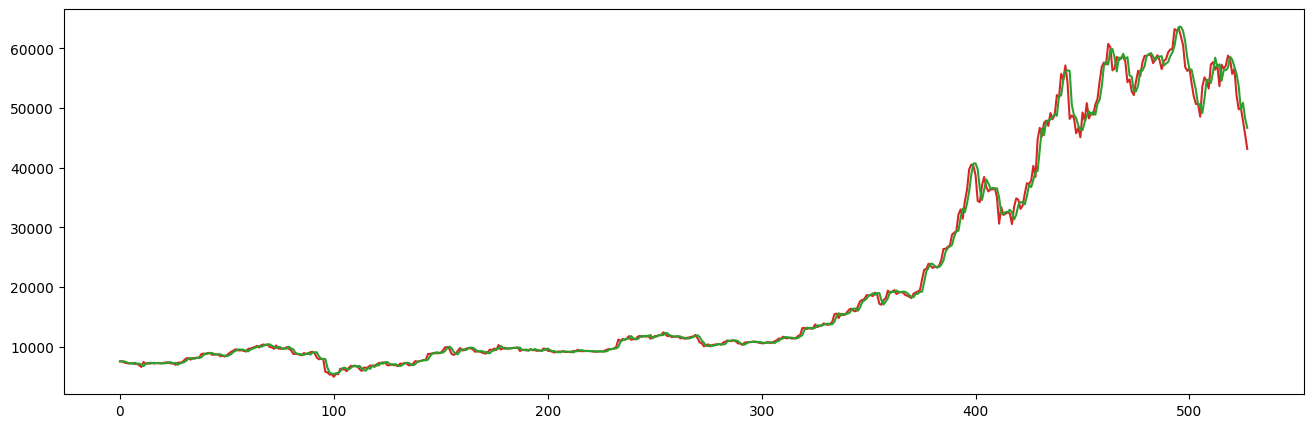

In [921]:
plot_forcast(pd.Series(np.squeeze(y_test_2_Horizons)), y_pred_2, start=0, end=None,title='Model 2 Forcast Window Size 30 Horizon 1')

## Model 3 : Same as Model 1,  Horizon = 7, window_size = 30

In [922]:
model_3 = dense_model(horizon=7, window_size=30)
model_3.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 128)               3968      
                                                                 
 dense_125 (Dense)           (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [923]:
X_train_3_windowed, y_train_3_Horizons, X_test_3_windowed, y_test_3_Horizons = get_window_data(y_train,y_test, window_size=30, horizon=7)

X_train_windowed shape: (2193, 30)
y_train_Horizons shape: (2193, 7)
X_test_windowed shape: (522, 30)
y_test_Horizons shape: (522, 7)


In [924]:
# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_3 = model_3.fit(X_train_3_windowed, y_train_3_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_3_windowed, y_test_3_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_3_Horizon_7_window_size_30")]
                        )

Saving Checkpoints to files :  model_check_point_logs/model_3_Horizon_7_window_size_30
Epoch 1/100
 1/18 [>.............................] - ETA: 4s - loss: 3256.7268 - mae: 3256.7268INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 29ms/step - loss: 1395.4471 - mae: 1395.4471 - val_loss: 3068.0627 - val_mae: 3068.0627
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 707.6796 - mae: 707.6796INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 28ms/step - loss: 550.4615 - mae: 550.4615 - val_loss: 2501.6487 - val_mae: 2501.6487
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 483.8642 - mae: 483.8642INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 431.1483 - mae: 431.1483 - val_loss: 2089.4883 - val_mae: 2089.4883
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 464.6837 - mae: 464.6837INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 386.5751 - mae: 386.5751 - val_loss: 2082.3674 - val_mae: 2082.3674
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 249.1706 - mae: 249.1706INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 24ms/step - loss: 346.0541 - mae: 346.0541 - val_loss: 1731.1381 - val_mae: 1731.1381
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 417.8339 - mae: 417.8339INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 56ms/step - loss: 322.7578 - mae: 322.7578 - val_loss: 1703.9473 - val_mae: 1703.9473
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 312.0732 - mae: 312.0732 - val_loss: 2099.0532 - val_mae: 2099.0532
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 324.4138 - mae: 324.4138 - val_loss: 1741.7778 - val_mae: 1741.7778
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 312.3467 - mae: 312.3467INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 25ms/step - loss: 302.1912 - mae: 302.1912 - val_loss: 1671.5753 - val_mae: 1671.5753
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 272.9011 - mae: 272.9011INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 30ms/step - loss: 282.6594 - mae: 282.6594 - val_loss: 1572.5945 - val_mae: 1572.5945
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 347.0399 - mae: 347.0399INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 281.2166 - mae: 281.2166 - val_loss: 1535.9656 - val_mae: 1535.9656
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 282.6841 - mae: 282.6841 - val_loss: 1544.0192 - val_mae: 1544.0192
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 222.6294 - mae: 222.6294INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 276.3534 - mae: 276.3534 - val_loss: 1492.1328 - val_mae: 1492.1328
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 272.9791 - mae: 272.9791INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 34ms/step - loss: 269.8224 - mae: 269.8224 - val_loss: 1466.5925 - val_mae: 1466.5925
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 266.2361 - mae: 266.2361 - val_loss: 1531.9606 - val_mae: 1531.9606
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 266.5398 - mae: 266.5398 - val_loss: 1518.6948 - val_mae: 1518.6948
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 276.2309 - mae: 276.2309 - val_loss: 1503.7920 - val_mae: 1503.7920
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 262.5593 - mae: 262.5593 - val_loss: 1520.9320 - val_mae: 1520.9320
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 259.3277 - mae: 259.3277 - val_loss: 1482.5088 - val_mae: 1482.5088
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 273.5667 - mae: 273.5667 - val_loss: 1614.8864 - val_mae: 1614.8864
Epoch 21/100
18/18

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 30ms/step - loss: 261.1436 - mae: 261.1436 - val_loss: 1450.1637 - val_mae: 1450.1637
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 255.0300 - mae: 255.0300 - val_loss: 1500.3929 - val_mae: 1500.3929
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 273.4338 - mae: 273.4338INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 35ms/step - loss: 261.1396 - mae: 261.1396 - val_loss: 1432.9178 - val_mae: 1432.9178
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 282.6161 - mae: 282.6161INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 32ms/step - loss: 259.6781 - mae: 259.6781 - val_loss: 1426.1594 - val_mae: 1426.1594
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 256.9863 - mae: 256.9863 - val_loss: 1476.2850 - val_mae: 1476.2850
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 298.8099 - mae: 298.8099INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 31ms/step - loss: 250.1617 - mae: 250.1617 - val_loss: 1404.8374 - val_mae: 1404.8374
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 250.4178 - mae: 250.4178 - val_loss: 1570.3856 - val_mae: 1570.3856
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 255.8611 - mae: 255.8611 - val_loss: 1454.3158 - val_mae: 1454.3158
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 247.8318 - mae: 247.8318 - val_loss: 1473.7999 - val_mae: 1473.7999
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 302.9362 - mae: 302.9362INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 40ms/step - loss: 248.2355 - mae: 248.2355 - val_loss: 1396.6504 - val_mae: 1396.6504
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 253.7320 - mae: 253.7320 - val_loss: 1407.7850 - val_mae: 1407.7850
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 294.9924 - mae: 294.9924INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 1s 32ms/step - loss: 247.4325 - mae: 247.4325 - val_loss: 1385.5463 - val_mae: 1385.5463
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 242.7030 - mae: 242.7030 - val_loss: 1463.4952 - val_mae: 1463.4952
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 248.0772 - mae: 248.0772 - val_loss: 1399.4895 - val_mae: 1399.4895
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 242.9465 - mae: 242.9465 - val_loss: 1391.2640 - val_mae: 1391.2640
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 187.1604 - mae: 187.1604INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 245.1901 - mae: 245.1901 - val_loss: 1356.7863 - val_mae: 1356.7863
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 244.9371 - mae: 244.9371 - val_loss: 1479.5452 - val_mae: 1479.5452
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 245.5499 - mae: 245.5499 - val_loss: 1388.8083 - val_mae: 1388.8083
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 244.9281 - mae: 244.9281 - val_loss: 1689.8876 - val_mae: 1689.8876
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 259.3179 - mae: 259.3179 - val_loss: 1376.5145 - val_mae: 1376.5145
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 245.9544 - mae: 245.9544 - val_loss: 1430.4857 - val_mae: 1430.4857
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 243.3739 - mae: 243.3739 - val_loss: 1592.3099 - val_mae: 1592.3099
Epoch 44/100
18/18

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 239.7549 - mae: 239.7549 - val_loss: 1351.3542 - val_mae: 1351.3542
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 237.6131 - mae: 237.6131 - val_loss: 1521.6085 - val_mae: 1521.6085
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 235.9819 - mae: 235.9819 - val_loss: 1414.0258 - val_mae: 1414.0258
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 236.8716 - mae: 236.8716 - val_loss: 1460.5062 - val_mae: 1460.5062
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 237.8906 - mae: 237.8906 - val_loss: 1432.9635 - val_mae: 1432.9635
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 238.1707 - mae: 238.1707 - val_loss: 1428.5785 - val_mae: 1428.5785
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 266.1199 - mae: 266.1199INFO:tensorflow:Assets written to: model_check_point_logs/model_3_

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 24ms/step - loss: 246.1631 - mae: 246.1631 - val_loss: 1349.4563 - val_mae: 1349.4563
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 235.9707 - mae: 235.9707 - val_loss: 1498.4613 - val_mae: 1498.4613
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 238.3121 - mae: 238.3121 - val_loss: 1433.4939 - val_mae: 1433.4939
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 237.3835 - mae: 237.3835 - val_loss: 1350.0087 - val_mae: 1350.0087
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 233.3029 - mae: 233.3029 - val_loss: 1393.6130 - val_mae: 1393.6130
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 239.7868 - mae: 239.7868 - val_loss: 1352.1969 - val_mae: 1352.1969
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 219.1068 - mae: 219.1068INFO:tensorflow:Assets written to: model_check_point_logs/model_3_

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 233.3239 - mae: 233.3239 - val_loss: 1349.4471 - val_mae: 1349.4471
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 233.4364 - mae: 233.4364 - val_loss: 1398.3126 - val_mae: 1398.3126
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 232.9134 - mae: 232.9134 - val_loss: 1398.9452 - val_mae: 1398.9452
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 230.8874 - mae: 230.8874 - val_loss: 1537.6564 - val_mae: 1537.6564
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 233.6722 - mae: 233.6722INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 24ms/step - loss: 243.0983 - mae: 243.0983 - val_loss: 1308.7542 - val_mae: 1308.7542
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 240.6240 - mae: 240.6240 - val_loss: 1329.4791 - val_mae: 1329.4791
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 234.4009 - mae: 234.4009 - val_loss: 1434.1497 - val_mae: 1434.1497
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 232.8429 - mae: 232.8429INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 231.1290 - mae: 231.1290 - val_loss: 1301.0736 - val_mae: 1301.0736
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 235.5703 - mae: 235.5703 - val_loss: 1326.8652 - val_mae: 1326.8652
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 240.1366 - mae: 240.1366 - val_loss: 1337.3384 - val_mae: 1337.3384
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 230.7105 - mae: 230.7105 - val_loss: 1361.5869 - val_mae: 1361.5869
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 231.0048 - mae: 231.0048 - val_loss: 1378.7804 - val_mae: 1378.7804
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 228.3710 - mae: 228.3710 - val_loss: 1386.8401 - val_mae: 1386.8401
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 258.7957 - mae: 258.7957INFO:tensorflow:Assets written to: model_check_point_logs/model_3_

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 28ms/step - loss: 229.8100 - mae: 229.8100 - val_loss: 1298.7501 - val_mae: 1298.7501
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 229.3872 - mae: 229.3872 - val_loss: 1359.3291 - val_mae: 1359.3291
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 227.1855 - mae: 227.1855 - val_loss: 1342.7148 - val_mae: 1342.7148
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 229.9849 - mae: 229.9849 - val_loss: 1325.0394 - val_mae: 1325.0394
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 234.3291 - mae: 234.3291 - val_loss: 1325.8884 - val_mae: 1325.8884
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 244.4399 - mae: 244.4399 - val_loss: 1392.7726 - val_mae: 1392.7726
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 241.3051 - mae: 241.3051 - val_loss: 1559.2982 - val_mae: 1559.2982
Epoch 78/100
18/18

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 26ms/step - loss: 230.7356 - mae: 230.7356 - val_loss: 1283.2019 - val_mae: 1283.2019
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 235.8038 - mae: 235.8038 - val_loss: 1335.1975 - val_mae: 1335.1975
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 231.0702 - mae: 231.0702 - val_loss: 1300.5709 - val_mae: 1300.5709
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 238.9997 - mae: 238.9997 - val_loss: 1347.9220 - val_mae: 1347.9220
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 227.6493 - mae: 227.6493 - val_loss: 1319.8528 - val_mae: 1319.8528
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 227.8200 - mae: 227.8200 - val_loss: 1330.1042 - val_mae: 1330.1042
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 225.5652 - mae: 225.5652 - val_loss: 1441.4303 - val_mae: 1441.4303
Epoch 89/100
18/18

INFO:tensorflow:Assets written to: model_check_point_logs/model_3_Horizon_7_window_size_30/assets


18/18 [==============================] - 0s 27ms/step - loss: 229.2389 - mae: 229.2389 - val_loss: 1274.8571 - val_mae: 1274.8571


In [925]:
# load the model from the checkpoint
model_3 = tf.keras.models.load_model('model_check_point_logs/model_3_Horizon_7_window_size_30')

# save the model
model_3.save('saved_models/model_3_Horizon_7_window_size_30.h5')

In [926]:
# evaluate the model
model_3.evaluate(X_test_3_windowed, y_test_3_Horizons)

17/17 [==============================] - 0s 1ms/step - loss: 1274.8571 - mae: 1274.8571


[1274.8570556640625, 1274.8570556640625]

In [927]:
# y_pred for model_3
y_pred_3 = model_3.predict(X_test_3_windowed)
y_pred_3 = tf.squeeze(y_pred_3)
y_pred_3.shape , y_test_3_Horizons.shape

(TensorShape([522, 7]), (522, 7))

In [928]:
model_3_forcast_metrics = evaluate_preds(y_test_3_Horizons, y_pred_3)
model_3_forcast_metrics

{'mae': 1274.86, 'mse': 5560322.4, 'rmse': 2358.03, 'mape': 5.53, 'mase': 2.18}

## Model 4 : Conv1D

In [929]:
# define a Conv1D model with horizon and window_size as input
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(7)),
                              tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                              tf.keras.layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
                              tf.keras.layers.Dense(128, activation='relu'),
                              tf.keras.layers.GlobalAvgPool1D(),
                              tf.keras.layers.Dense(1, activation='linear')
                                ])

model_4.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_10 (Lambda)          (None, 1, 7)              0         
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 128)            6400      
                                                                 
 dense_126 (Dense)           (None, 1, 128)            16512     
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_127 (Dense)           (None, 1)                 129       
                                                                 
Total params: 23,041
Trainable params: 23,041
Non-trainable params: 0
_________________________________________________

In [930]:
X_train_4_windowed, y_train_4_Horizons, X_test_4_windowed, y_test_4_Horizons = get_window_data(y_train,y_test, window_size=7, horizon=1)

X_train_windowed shape: (2222, 7)
y_train_Horizons shape: (2222, 1)
X_test_windowed shape: (551, 7)
y_test_Horizons shape: (551, 1)


In [931]:
# compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_4 = model_4.fit(X_train_4_windowed, y_train_4_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_4_windowed, y_test_4_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_4_Conv_1D_Horizon_1_window_size_7")]
                        )

Saving Checkpoints to files :  model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7
Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 3139.8750 - mae: 3139.8750INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 51ms/step - loss: 1486.6292 - mae: 1486.6292 - val_loss: 3598.4504 - val_mae: 3598.4504
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 675.9783 - mae: 675.9783INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 45ms/step - loss: 310.6091 - mae: 310.6091 - val_loss: 1369.3187 - val_mae: 1369.3187
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 255.7794 - mae: 255.7794INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 45ms/step - loss: 205.6968 - mae: 205.6968 - val_loss: 1050.8453 - val_mae: 1050.8453
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 247.4522 - mae: 247.4522INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 45ms/step - loss: 186.7961 - mae: 186.7961 - val_loss: 1050.5585 - val_mae: 1050.5585
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 149.0258 - mae: 149.0258INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 45ms/step - loss: 185.9336 - mae: 185.9336 - val_loss: 1027.4556 - val_mae: 1027.4556
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 178.3418 - mae: 178.3418INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 46ms/step - loss: 182.0844 - mae: 182.0844 - val_loss: 1012.0613 - val_mae: 1012.0613
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 178.9975 - mae: 178.9975 - val_loss: 1055.3806 - val_mae: 1055.3806
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 169.2307 - mae: 169.2307INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 51ms/step - loss: 171.0598 - mae: 171.0598 - val_loss: 941.7562 - val_mae: 941.7562
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 168.6347 - mae: 168.6347 - val_loss: 981.3573 - val_mae: 981.3573
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 161.4273 - mae: 161.4273 - val_loss: 942.4747 - val_mae: 942.4747
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 157.6117 - mae: 157.6117INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 43ms/step - loss: 160.8777 - mae: 160.8777 - val_loss: 875.4525 - val_mae: 875.4525
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 155.4254 - mae: 155.4254 - val_loss: 898.8118 - val_mae: 898.8118
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 151.2759 - mae: 151.2759 - val_loss: 879.8722 - val_mae: 879.8723
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 153.1848 - mae: 153.1848 - val_loss: 883.4379 - val_mae: 883.4379
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 154.6645 - mae: 154.6645INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 46ms/step - loss: 140.4113 - mae: 140.4113 - val_loss: 767.4331 - val_mae: 767.4331
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 120.8512 - mae: 120.8512INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 46ms/step - loss: 135.6455 - mae: 135.6455 - val_loss: 741.0959 - val_mae: 741.0959
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 132.0556 - mae: 132.0556 - val_loss: 785.8671 - val_mae: 785.8671
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 117.2998 - mae: 117.2998INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 45ms/step - loss: 130.8235 - mae: 130.8235 - val_loss: 720.6090 - val_mae: 720.6090
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 130.7490 - mae: 130.7490 - val_loss: 775.0146 - val_mae: 775.0146
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 136.0602 - mae: 136.0602INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 52ms/step - loss: 130.9120 - mae: 130.9120 - val_loss: 704.5142 - val_mae: 704.5142
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 153.2901 - mae: 153.2901INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 44ms/step - loss: 122.1532 - mae: 122.1532 - val_loss: 683.0950 - val_mae: 683.0950
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 124.2584 - mae: 124.2584INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 46ms/step - loss: 120.3640 - mae: 120.3640 - val_loss: 654.9241 - val_mae: 654.9241
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 124.3986 - mae: 124.3986 - val_loss: 681.2344 - val_mae: 681.2344
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5198 - mae: 121.5198 - val_loss: 666.6298 - val_mae: 666.6298
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 57.2014 - mae: 57.2014INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 80ms/step - loss: 117.8506 - mae: 117.8506 - val_loss: 625.8848 - val_mae: 625.8848
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 139.2377 - mae: 139.2377INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 43ms/step - loss: 115.7386 - mae: 115.7386 - val_loss: 618.2921 - val_mae: 618.2921
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 114.5843 - mae: 114.5843INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 53ms/step - loss: 114.5843 - mae: 114.5843 - val_loss: 614.4141 - val_mae: 614.4141
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 122.0579 - mae: 122.0579 - val_loss: 627.3466 - val_mae: 627.3466
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2430 - mae: 114.2430 - val_loss: 615.8177 - val_mae: 615.8177
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 102.7511 - mae: 102.7511INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 42ms/step - loss: 115.5719 - mae: 115.5719 - val_loss: 606.6990 - val_mae: 606.6990
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 113.5617 - mae: 113.5617INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 47ms/step - loss: 113.5617 - mae: 113.5617 - val_loss: 598.3074 - val_mae: 598.3074
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9323 - mae: 113.9323 - val_loss: 680.9289 - val_mae: 680.9289
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 137.2786 - mae: 137.2786INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 43ms/step - loss: 113.0786 - mae: 113.0786 - val_loss: 591.0587 - val_mae: 591.0587
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0132 - mae: 114.0132 - val_loss: 634.8327 - val_mae: 634.8327
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5320 - mae: 112.5320 - val_loss: 607.4705 - val_mae: 607.4705
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2504 - mae: 111.2504 - val_loss: 605.8671 - val_mae: 605.8671
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0368 - mae: 112.0368 - val_loss: 679.1375 - val_mae: 679.1375
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 122.8173 - mae: 122.8173 - val_loss: 634.3233 - val_mae: 634.3233
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 120.6768 - mae: 120.6768 - val_loss: 680.5991 - val_mae: 680.5991
Epoch 40/100
18/18 [============

INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 41ms/step - loss: 112.1364 - mae: 112.1364 - val_loss: 588.7100 - val_mae: 588.7100
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5237 - mae: 115.5237 - val_loss: 640.2487 - val_mae: 640.2487
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 98.8492 - mae: 98.8492INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 47ms/step - loss: 118.6166 - mae: 118.6166 - val_loss: 583.7464 - val_mae: 583.7464
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5327 - mae: 112.5327 - val_loss: 685.0151 - val_mae: 685.0151
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7001 - mae: 105.7001INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 44ms/step - loss: 113.6680 - mae: 113.6680 - val_loss: 580.2134 - val_mae: 580.2134
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5338 - mae: 111.5338 - val_loss: 604.8606 - val_mae: 604.8606
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2864 - mae: 112.2864 - val_loss: 775.1003 - val_mae: 775.1003
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1913 - mae: 111.1913 - val_loss: 658.9172 - val_mae: 658.9172
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0442 - mae: 112.0442 - val_loss: 633.2101 - val_mae: 633.2101
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4042 - mae: 119.4042 - val_loss: 858.2231 - val_mae: 858.2231
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7350 - mae: 124.7350 - val_loss: 695.6850 - val_mae: 695.6850
Epoch 52/100
18/18 [============

INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 41ms/step - loss: 113.6118 - mae: 113.6118 - val_loss: 578.2070 - val_mae: 578.2070
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 116.9176 - mae: 116.9176 - val_loss: 641.1417 - val_mae: 641.1417
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 123.9813 - mae: 123.9813 - val_loss: 738.2682 - val_mae: 738.2682
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 116.4871 - mae: 116.4871 - val_loss: 589.9709 - val_mae: 589.9709
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5320 - mae: 113.5320 - val_loss: 650.3665 - val_mae: 650.3665
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2713 - mae: 112.2713 - val_loss: 599.0435 - val_mae: 599.0435
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3319 - mae: 110.3319 - val_loss: 711.7067 - val_mae: 711.7067
Epoch 62/100
18/18 [============

INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 42ms/step - loss: 114.4886 - mae: 114.4886 - val_loss: 570.6583 - val_mae: 570.6583
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2511 - mae: 113.2511 - val_loss: 766.7613 - val_mae: 766.7613
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7234 - mae: 115.7234 - val_loss: 627.8224 - val_mae: 627.8224
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5458 - mae: 113.5458 - val_loss: 684.8760 - val_mae: 684.8760
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5027 - mae: 112.5027 - val_loss: 574.6035 - val_mae: 574.6035
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4382 - mae: 109.4382 - val_loss: 717.4230 - val_mae: 717.4230
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 125.6718 - mae: 125.6718 - val_loss: 698.3290 - val_mae: 698.3290
Epoch 71/100
18/18 [============

INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 42ms/step - loss: 109.1189 - mae: 109.1189 - val_loss: 570.5784 - val_mae: 570.5784
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6044 - mae: 106.6044 - val_loss: 633.8058 - val_mae: 633.8058
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2695 - mae: 113.2695 - val_loss: 660.0524 - val_mae: 660.0524
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 127.7841 - mae: 127.7841 - val_loss: 582.5828 - val_mae: 582.5828
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4068 - mae: 109.4068 - val_loss: 581.1591 - val_mae: 581.1591
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 105.6861 - mae: 105.6861 - val_loss: 572.8932 - val_mae: 572.8932
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 106.0391 - mae: 106.0391 - val_loss: 601.1503 - val_mae: 601.1503
Epoch 85/100
18/18 [============

INFO:tensorflow:Assets written to: model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7/assets


18/18 [==============================] - 1s 42ms/step - loss: 113.6021 - mae: 113.6021 - val_loss: 566.6931 - val_mae: 566.6931
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8339 - mae: 116.8339 - val_loss: 567.3474 - val_mae: 567.3474
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4753 - mae: 105.4753 - val_loss: 617.6310 - val_mae: 617.6310
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 106.3902 - mae: 106.3902 - val_loss: 577.9938 - val_mae: 577.9938
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6991 - mae: 111.6991 - val_loss: 568.3724 - val_mae: 568.3724


In [932]:
# load the model from the checkpoint
model_4 = tf.keras.models.load_model('model_check_point_logs/model_4_Conv_1D_Horizon_1_window_size_7')

# save the model
model_4.save('saved_models/model_4_Conv_1D_Horizon_1_window_size_7.h5')

In [933]:
# evaluate the model
model_4.evaluate(X_test_4_windowed, y_test_4_Horizons)

18/18 [==============================] - 0s 1ms/step - loss: 566.6930 - mae: 566.6930


[566.6929931640625, 566.6929931640625]

In [934]:
# y_pred for model_4
y_pred_4 = model_4.predict(X_test_4_windowed)
y_pred_4 = tf.squeeze(y_pred_4)
y_pred_4.shape , y_test_4_Horizons.shape

(TensorShape([551]), (551, 1))

In [935]:
# get the evaluation metrics for model_4
model_4_forcast_metrics = evaluate_preds(y_test_4_Horizons, y_pred_4)
model_4_forcast_metrics

{'mae': 566.69,
 'mse': 1163389.49,
 'rmse': 1078.61,
 'mape': 113.81,
 'mase': 0.99}

## Model 5 : LSTM

In [936]:
# define a LSTM model with horizon and window_size as input
import tensorflow as tf
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(7)),
                              tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                              tf.keras.layers.LSTM(128, activation='relu'),
                              tf.keras.layers.Dense(128, activation='relu'),
                              tf.keras.layers.Dense(1, activation='linear')
                                ])

model_5.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 1, 7)              0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               69632     
                                                                 
 dense_128 (Dense)           (None, 128)               16512     
                                                                 
 dense_129 (Dense)           (None, 1)                 129       
                                                                 
Total params: 86,273
Trainable params: 86,273
Non-trainable params: 0
_________________________________________________________________


In [937]:
X_train_5_windowed, y_train_5_Horizons, X_test_5_windowed, y_test_5_Horizons = get_window_data(y_train,y_test, window_size=7, horizon=1)

X_train_windowed shape: (2222, 7)
y_train_Horizons shape: (2222, 1)
X_test_windowed shape: (551, 7)
y_test_Horizons shape: (551, 1)


In [ ]:
# compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_5 = model_5.fit(X_train_5_windowed, y_train_5_Horizons,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_5_windowed, y_test_5_Horizons),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_5_LSTM_Horizon_1_window_size_7")]
                        )

In [939]:
# load the model from the checkpoint
model_5 = tf.keras.models.load_model('model_check_point_logs/model_5_LSTM_Horizon_1_window_size_7')

# save the model
model_5.save('saved_models/model_5_LSTM_Horizon_1_window_size_7.h5')

In [940]:
# evaluate the model
model_5.evaluate(X_test_5_windowed, y_test_5_Horizons)

18/18 [==============================] - 0s 2ms/step - loss: 576.9154 - mae: 576.9154


[576.9154052734375, 576.9154052734375]

In [941]:
# y_pred for model_5
y_pred_5 = model_5.predict(X_test_5_windowed)
y_pred_5 = tf.squeeze(y_pred_5)
y_pred_5.shape , y_test_5_Horizons.shape

(TensorShape([551]), (551, 1))

In [942]:
# get the evaluation metrics for model_5
model_5_forcast_metrics = evaluate_preds(y_test_5_Horizons, y_pred_5)
model_5_forcast_metrics

{'mae': 576.92,
 'mse': 1202442.39,
 'rmse': 1096.56,
 'mape': 113.98,
 'mase': 1.01}

## Model 6 : Same as Model 1 with multivariate data

In [966]:
# Make a multi variate time series data on bitcoin block reward features
df_block_reward = df.copy()
df_block_reward['block_reward'] = 25
df_block_reward.loc['2016-07-09','block_reward'] = 12.5
df_block_reward.loc['2020-05-11','block_reward'] = 6.25

# fill down the block_reward column
df_block_reward['block_reward'] = df_block_reward['block_reward'].replace(to_replace=25, method='ffill')
df_block_reward = df_block_reward[['Price','block_reward']]
df_block_reward

,Price,block_reward
Date,,
2013-10-01,123.654990,25.00
2013-10-02,125.455000,25.00
2013-10-03,108.584830,25.00
2013-10-04,118.674660,25.00
2013-10-05,121.338660,25.00
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


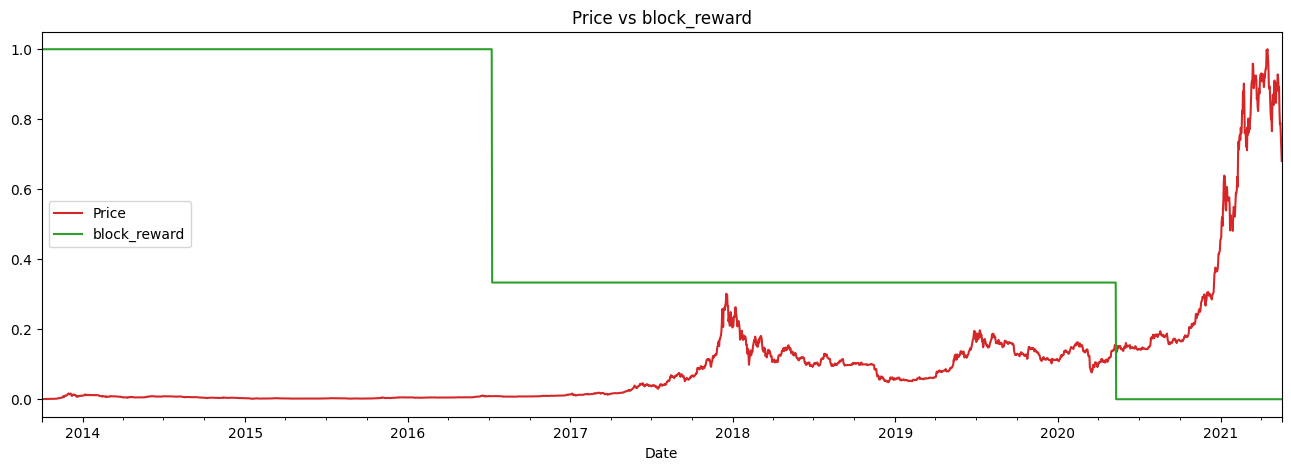

In [967]:
# plot the data for closing price and block_reward in single plot by using min-max scaler
from sklearn.preprocessing import MinMaxScaler
df_block_reward_cp = df_block_reward.copy()
scaler = MinMaxScaler()
df_block_reward_cp[['Price','block_reward']] = scaler.fit_transform(df_block_reward_cp[['Price','block_reward']])
df_block_reward_cp[['Price','block_reward']].plot(figsize=(16,5), color=['tab:red','tab:green'])
plt.title('Price vs block_reward')
plt.show()

In [969]:
# create new columns in df_block_reward pd.DataFrame.shift() method
df_block_reward['Price_t-1'] = df_block_reward['Price'].shift(1)
df_block_reward['Price_t-2'] = df_block_reward['Price'].shift(2)
df_block_reward['Price_t-3'] = df_block_reward['Price'].shift(3)
df_block_reward['Price_t-4'] = df_block_reward['Price'].shift(4)
df_block_reward['Price_t-5'] = df_block_reward['Price'].shift(5)
df_block_reward['Price_t-6'] = df_block_reward['Price'].shift(6)
df_block_reward['Price_t-7'] = df_block_reward['Price'].shift(7)

# drop the rows with NaN values
df_block_reward.dropna(inplace=True)
df_block_reward

,Price,block_reward,Price_t-1,Price_t-2,Price_t-3,Price_t-4,Price_t-5,Price_t-6,Price_t-7
Date,,,,,,,,,
2013-10-08,123.033000,25.00,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,25.00,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,25.00,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,25.00,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,25.00,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [970]:
# split the data into train and test
split_size = int(len(df_block_reward) * 0.8)
train_df_block_reward = df_block_reward[:split_size]
test_df_block_reward = df_block_reward[split_size:]
len(train_df_block_reward), len(test_df_block_reward)

(2224, 556)

In [971]:
# create X_train, y_train, X_test, y_test
X_train_block_reward, y_train_block_reward = train_df_block_reward.drop(['Price'], axis=1), train_df_block_reward['Price']
X_test_block_reward, y_test_block_reward = test_df_block_reward.drop(['Price'], axis=1), test_df_block_reward['Price']
X_train_block_reward.shape, y_train_block_reward.shape, X_test_block_reward.shape, y_test_block_reward.shape

((2224, 8), (2224,), (556, 8), (556,))

In [974]:
# define a dense model with horizon and window_size as input
import tensorflow as tf
window_size=7
horizon=1
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(window_size+1)),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(horizon, activation='linear')
                                ])
model_6.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 128)               1152      
                                                                 
 dense_133 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
history_6 = model_6.fit(X_train_block_reward, y_train_block_reward,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test_block_reward, y_test_block_reward),
                        callbacks=[prepare_checkpoint_call_back(dir_name="model_check_point_logs",
                                                                experiment_name="model_6_multi_variate_Horizon_1_window_size_7")]
                        )

In [976]:
# load the model from the checkpoint
model_6 = tf.keras.models.load_model('model_check_point_logs/model_6_multi_variate_Horizon_1_window_size_7')

# save the model
model_6.save('saved_models/model_6_multi_variate_Horizon_1_window_size_7.h5')

In [977]:
# evaluate the model
model_6.evaluate(X_test_block_reward, y_test_block_reward)

18/18 [==============================] - 0s 1ms/step - loss: 568.3355 - mae: 568.3355


[568.3355102539062, 568.3355102539062]

In [978]:
# y_pred for model_6
y_pred_6 = model_6.predict(X_test_block_reward)
y_pred_6 = tf.squeeze(y_pred_6)
y_pred_6.shape , y_test_block_reward.shape

(TensorShape([556]), (556,))

In [979]:
# get the evaluation metrics for model_6
model_6_forcast_metrics = evaluate_preds(y_test_block_reward, y_pred_6)
model_6_forcast_metrics

{'mae': 568.34, 'mse': 1164860.15, 'rmse': 1079.29, 'mape': 2.55, 'mase': 1.0}

## Model 7 : N-BEATS Algorithm

In [942]:
# define a N-BEATS model with horizon and window_size as input
import tensorflow as tf
tf.random.set_seed(42)


## Model 8 : Ensemble Model

## Model 9 : Future Prediction Model

## Model 10 : Same as Model 1 with turkey data

# Evaluation of all Models

In [982]:
# Collect all the evaluation metrics for all the models as a data frame
model_evaluation_metrics = pd.DataFrame(
                                        {
                                            'naive_forcast':naive_forcast_metrics,
                                            'Dense_model_Horizon_1_window_size_7':model_1_forcast_metrics,
                                            'Dense_model_Horizon_1_window_size_30':model_2_forcast_metrics,
                                            'Dense_model_Horizon_7_window_size_30':model_3_forcast_metrics,
                                            'Conv1D_model_Horizon_1_window_size_7':model_4_forcast_metrics,
                                            'LSTM_model_Horizon_1_window_size_7':model_5_forcast_metrics,
                                            'Multi_variate_Data_Horizon_1_window_size_7':model_6_forcast_metrics,
                                         },

                                        index=['mae', 'mse', 'rmse', 'mape', 'mase'])

# sort the data frame by mae
model_evaluation_metrics.transpose().sort_values(by='mae')

,mae,mse,rmse,mape,mase
Conv1D_model_Horizon_1_window_size_7,566.69,1163389.49,1078.61,113.81,0.99
naive_forcast,567.98,1147547.13,1071.24,2.52,1.00
Multi_variate_Data_Horizon_1_window_size_7,568.34,1164860.15,1079.29,2.55,1.00
Dense_model_Horizon_1_window_size_7,571.57,1185001.00,1088.58,113.90,1.00
LSTM_model_Horizon_1_window_size_7,576.92,1202442.39,1096.56,113.98,1.01
Dense_model_Horizon_1_window_size_30,620.08,1313132.54,1145.92,114.63,1.05
Dense_model_Horizon_7_window_size_30,1274.86,5560322.40,2358.03,5.53,2.18


In [944]:
# plot all the models forcast curve as subplots in 4 rows and 1 columns
# START=400
# END=None
# plt.figure(figsize=(16,10), dpi=100)
# plt.subplot(4,1,1)
# plot_forcast(y_test, naive_forcast, start=START, end=END,title='Naive Forcast')
# plt.show()
# plt.subplot(4,2,1)
# plot_forcast(pd.Series(np.squeeze(y_test_1_Horizons)), y_pred_1, start=START, end=END,title='Model 1 Forcast Window Size 7 Horizon 1')
# plt.show()
# plt.subplot(4,3,1)
# plot_forcast(pd.Series(np.squeeze(y_test_2_Horizons)), y_pred_2, start=START, end=END,title='Model 2 Forcast Window Size 30 Horizon 1')
# plt.show()
# plt.subplot(4,4,1)
# plot_forcast(pd.Series(np.mean(y_test_3_Horizons, axis=1)), np.mean(y_pred_3, axis=1),
#              start=START, end=END,title='Model 3 Forcast Window Size 30 Horizon 7'
#              )